In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
from scipy import stats

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [2]:
ct = 'Oligo_NN'
_gender = 'Male'
mc_type = 'CGN'

In [3]:
gene_name_to_id = joblib.load('/home/qzeng/project/aging/240112_DMG_CEF/gene_name_to_id_dict')
gene_id_to_name = joblib.load('/home/qzeng/project/aging/240112_DMG_CEF/gene_id_to_name_dict')

gene_meta_path = '/home/qzeng/project/aging/metadata/gencode.vM22.basic.annotation.gene.flat.tsv.gz'
gene_meta = pd.read_csv(gene_meta_path, index_col ='gene_id', sep='\t')
gene_meta['length'] = gene_meta['end'] - gene_meta['start']
gene_length_dict = gene_meta['length'].to_dict()

In [4]:
_dir = '/home/qzeng/project/aging/240518_redo_aDMG/240112_DMG_CEF'
mc_all = pd.read_csv(f'{_dir}/dmg_result/{_gender}.{mc_type}.DMG.csv', index_col = 0)
mc_all['celltype'] = mc_all['celltype'].apply(lambda x: x.replace('/','').replace(' ','_'))
mc_all

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pvalue,corrected_pvalue,18mo,8wk,9mo,gene_length,celltype,methylation_change,abs_change,trend,DMG
geneslop2k,,,,,,,,,,,
ENSMUSG00000117337.1,1.264014e-05,0.004679,0.754929,0.653444,0.719705,1713,Astro-TE_NN,0.101485,0.101485,Aging Hyper,True
ENSMUSG00000094483.2,7.946205e-08,0.000148,0.634706,0.521179,0.604175,8318,Astro-TE_NN,0.113527,0.113527,Aging Hyper,True
ENSMUSG00000036430.8,1.013756e-06,0.000840,0.664198,0.545210,0.593113,1163,Astro-TE_NN,0.118988,0.118988,Aging Hyper,True
ENSMUSG00000106103.1,3.029019e-06,0.001746,0.844819,0.734021,0.763767,1379,Astro-TE_NN,0.110798,0.110798,Aging Hyper,True
ENSMUSG00000028675.12,4.924092e-08,0.000106,0.686385,0.568628,0.635950,2932,Astro-TE_NN,0.117756,0.117756,Aging Hyper,True
...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000002109.14,5.401627e-01,1.000000,0.964370,0.943484,0.962640,25410,Vip_Gaba,0.020887,0.020887,NaN,False
ENSMUSG00000015671.11,8.971765e-01,1.000000,0.945873,0.949515,0.940863,60996,Vip_Gaba,-0.003642,0.003642,NaN,False
ENSMUSG00000039840.8,7.025162e-02,1.000000,1.110578,1.126709,1.112993,96548,Vip_Gaba,-0.016130,0.016130,NaN,False


In [18]:
mc_all

,pvalue,corrected_pvalue,18mo,8wk,9mo,gene_length,celltype,methylation_change,abs_change,trend,DMG
geneslop2k,,,,,,,,,,,
ENSMUSG00000117337.1,1.264014e-05,0.004679,0.754929,0.653444,0.719705,1713,Astro-TE_NN,0.101485,0.101485,Aging Hyper,True
ENSMUSG00000094483.2,7.946205e-08,0.000148,0.634706,0.521179,0.604175,8318,Astro-TE_NN,0.113527,0.113527,Aging Hyper,True
ENSMUSG00000036430.8,1.013756e-06,0.000840,0.664198,0.545210,0.593113,1163,Astro-TE_NN,0.118988,0.118988,Aging Hyper,True
ENSMUSG00000106103.1,3.029019e-06,0.001746,0.844819,0.734021,0.763767,1379,Astro-TE_NN,0.110798,0.110798,Aging Hyper,True
ENSMUSG00000028675.12,4.924092e-08,0.000106,0.686385,0.568628,0.635950,2932,Astro-TE_NN,0.117756,0.117756,Aging Hyper,True
...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000002109.14,5.401627e-01,1.000000,0.964370,0.943484,0.962640,25410,Vip_Gaba,0.020887,0.020887,NaN,False
ENSMUSG00000015671.11,8.971765e-01,1.000000,0.945873,0.949515,0.940863,60996,Vip_Gaba,-0.003642,0.003642,NaN,False
ENSMUSG00000039840.8,7.025162e-02,1.000000,1.110578,1.126709,1.112993,96548,Vip_Gaba,-0.016130,0.016130,NaN,False


In [5]:
#mc_all = pd.read_csv(f'result/{_gender}.{mc_type}.AllGene.Anova.Result.csv', index_col = 0)

## select DEGs

In [3]:
!pwd

/home/qzeng/project/aging/240518_redo_aDMG


In [6]:
rna_df = pd.read_csv(f"DEGs/{ct}.csv", index_col = 0)
rna_df['log2(Aged/Young)'] = -rna_df['avg_log2FC']

In [7]:
_type = 'DEG'
pvalue_cutoff = 0.05
fc_cutoff = 0.1

In [8]:
if _type == 'DEG':
    # select DEGs
    deg_df = rna_df[(rna_df['p_val_adj'] < pvalue_cutoff) & (abs(rna_df['log2(Aged/Young)']) > fc_cutoff)]
    
    # get DEG mc info
    mc_df  = mc_all[mc_all['celltype'] == ct].copy()
    mc_df['gene_name'] = mc_df.index.map(gene_id_to_name)

    deg_mc_df = mc_df.set_index('gene_name')
    deg_mc_df = deg_mc_df.loc[deg_mc_df.index.isin(deg_df.index)]
    deg_mc_df['Aged-Young'] = deg_mc_df['18mo'] - deg_mc_df['8wk']
    print(f'{deg_mc_df.shape[0]} DEGs')
    
    # also filter for DMGs
    deg_mc_df  = deg_mc_df[deg_mc_df['pvalue'] < 0.05]
    # filter duplicate genes
    unique_genes = deg_mc_df.index.value_counts()[deg_mc_df.index.value_counts() == 1].index
    deg_df = deg_df.loc[unique_genes]
    deg_mc_df = deg_mc_df.loc[unique_genes]
    
    to_plot = pd.concat([deg_df[['log2(Aged/Young)']], deg_mc_df[['Aged-Young']]], axis = 1)
    to_plot = to_plot.dropna()
    print(f'{to_plot.shape[0]} shared genes')

2950 DEGs
1262 shared genes


In [9]:
to_plot.head()

,log2(Aged/Young),Aged-Young
Ndufb10,-0.783544,0.100199
Rps28,-0.572783,0.071296
Tle1,0.318885,0.023682
Hist1h1c,-0.764296,0.059853
Rnf43,0.436247,-0.016585


In [10]:
to_plot['abs'] = to_plot['log2(Aged/Young)'] * to_plot['Aged-Young']

In [11]:
res = stats.pearsonr(to_plot['log2(Aged/Young)'], to_plot['Aged-Young'])
_corr =res[0].round(2)
res

(-0.578454718281389, 1.3391357364951856e-113)

In [12]:
to_annot = to_plot.sort_values('abs').head(10)
to_annot.sort_values('Aged-Young')

,log2(Aged/Young),Aged-Young,abs
Il33,0.619061,-0.177520,-0.109895
Neat1,0.995652,-0.100240,-0.099804
Gm42756,1.313287,-0.100161,-0.131541
7630403G23Rik,2.219696,-0.045394,-0.100760
Ubb,-1.565080,0.070888,-0.110945
Rnasek,-1.404256,0.081900,-0.115009
Tuba1a,-1.372219,0.094832,-0.130130
B4gat1,-1.520323,0.097968,-0.148942
H2afz,-0.951047,0.112231,-0.106737
Rpl10a,-0.994401,0.118249,-0.117587


In [15]:
to_annot_genes = ['Il33','Neat1','Ubb','Rpl10a','Rpl13','Rpl18a','Rplp1','Rps3'] # Oligo
#to_annot_genes = ['Neat1','C1qc','C1qa','Calr','Lamp1','Rpl15'] # Migroglia
#to_annot_genes = ['Rpl13','Rps8','Rpl17','Rps2','Rps27a','Rpl13a','Ubb','Rps14','Rpl9'] # DG
#to_annot_genes = ['C1ql3','Lmo4','Rpl41'] # L6_IT_CTX_Glut
#to_annot_genes = ['Acer3','Atp5k','Rpl34','Snrpd2'] # STR_D1_Sema5a_Gaba #'Rpl17','Rpl6','Rpl31',

In [16]:
to_annot = to_annot.loc[to_annot.index.isin(to_annot_genes)]
to_annot

,log2(Aged/Young),Aged-Young,abs
Rpl10a,-0.994401,0.118249,-0.117587
Ubb,-1.565080,0.070888,-0.110945
Il33,0.619061,-0.177520,-0.109895
Neat1,0.995652,-0.100240,-0.099804


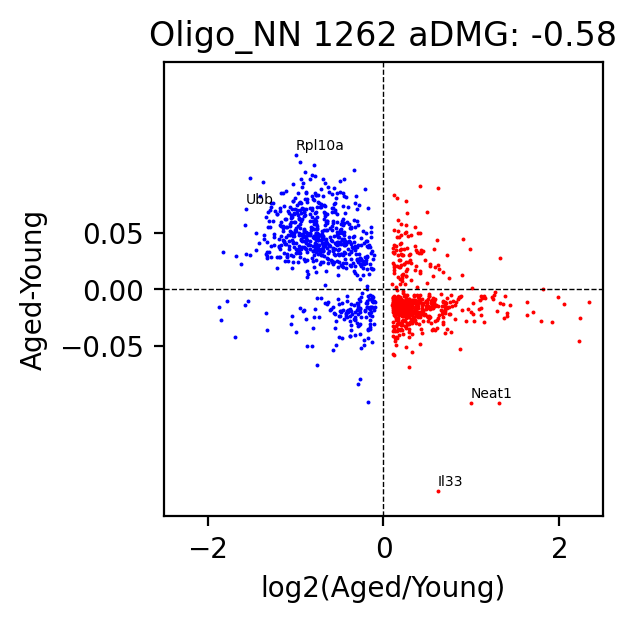

In [17]:
fig, ax = plt.subplots(figsize = (3,3),  dpi = 200, constrained_layout = True)
sns.scatterplot(data = to_plot[to_plot['log2(Aged/Young)'] > 0],
                color = 'red',
                rasterized = True,
                s = 2,linewidth = 0,
               x = 'log2(Aged/Young)',
               y = 'Aged-Young')
sns.scatterplot(data = to_plot[to_plot['log2(Aged/Young)'] < 0],
                color = 'blue',
                rasterized = True,
                s = 2,linewidth = 0,
               x = 'log2(Aged/Young)',
               y = 'Aged-Young')

for gene_id, row in to_annot.iterrows():
    s = row.name
    if s.startswith('Gm') or s.startswith(tuple('0123456789')):
        continue
    x = row['log2(Aged/Young)']
    y = row['Aged-Young']
    ax.text(x = x, y=y +0.005
            , s=s,fontsize=5)
    
ax.set(xlim = (-2.5,2.5), ylim = (-0.2, 0.2))
ax.set_yticks([-0.05, 0, 0.05])
ax.set_xticks([-2, 0, 2])
ax.axvline(x=0, color='black', linestyle='--', lw = 0.5)
ax.axhline(y=0, color='black', linestyle='--', lw = 0.5)
ax.set_title(f'{ct} {to_plot.shape[0]} aDMG: {_corr}')
#fig.savefig(f'figure/{ct}.{mc_type}.{_gender}.aDMG.pdf',  bbox_inches='tight')
plt.show()